In [1]:
import collections
import pickle
import sys
import warnings
import os
from random import shuffle

In [2]:
from discopy.tensor import Tensor
from discopy import Word
from discopy.rigid import Functor
import spacy

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random, unique
from lambeq import AtomicType, IQPAnsatz, remove_cups, NumpyModel, spiders_reader, cups_reader, stairs_reader, Rewriter

In [4]:
# from lambeq import Bobcat
from lambeq import Dataset
from lambeq import TreeReader, TreeReaderMode
from lambeq import QuantumTrainer, SPSAOptimizer
from lambeq import TketModel
from lambeq import SpacyTokeniser
from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.qiskit import AerBackend

In [7]:
from DepAnsatz import (Sim13Ansatz as Sim13)
print("packages are imported")

packages are imported


In [8]:
warnings.filterwarnings("ignore")
os.environ["TOKENIZERS_PARALLELISM"] = "false"
spacy.load('en_core_web_sm')

In [9]:
BATCH_SIZE = 30
EPOCHS = 300
SEED = 0

In [10]:
short_lists = [["TBH", "to be honest"], ["FYI", "for your information"], ["BRB", "be right back"]]
# Function for replacing low occuring word(s) with <unk> token
def replace(box):
    if isinstance(box, Word) and dataset.count(box.name) < 2:
        return Word('unk', box.cod, box.dom)
    return box

In [11]:
# Function for removing punctuations at sentence level
def remove_dots_commas(sentence):
    sentence = sentence.replace(",", "")
    sentence = sentence.replace(" .", "")
    return sentence

In [12]:
# Function for removing punctuations at sentence level for a list of sentences
def remove_dots_commas_sentences(list):
    for i in list:
        i = remove_dots_commas(i)
    return list

In [13]:
# Function for removing determiners at sentence level
def remove_determiner(sentence):
    sentence = sentence.replace("the ", "")
    sentence = sentence.replace("The ", "")
    return sentence

In [14]:
# Function for removing determiners at sentence level for a list of sentences
def remove_determiner_sentences(list):
    for i in list:
        i = remove_determiner(i)
    return list

In [15]:
# Function for removing auxiliary at sentence level
def remove_auxiliary(sentence):
    sentence = sentence.replace("I am", "I")
    sentence = sentence.replace("I 'm", "I")
    sentence = sentence.replace("I was", "I")
    sentence = sentence.replace("I were", "I")
    sentence = sentence.replace("you are", "you")
    sentence = sentence.replace("you were", "you")
    sentence = sentence.replace("you 're", "you")
    sentence = sentence.replace("he is", "he")
    sentence = sentence.replace("he was", "he")
    sentence = sentence.replace("he 's", "he")
    sentence = sentence.replace("she is", "she")
    sentence = sentence.replace("she was", "she")
    sentence = sentence.replace("she 's", "he")
    sentence = sentence.replace("they are", "they")
    sentence = sentence.replace("they 're", "they")
    sentence = sentence.replace("they were", "they")
    return sentence

In [16]:
# Function for removing auxiliary at sentence level for a list of sentences
def remove_auxiliary_sentences(list):
    for i in list:
        i = remove_auxiliary(i)
    return list


# Function for removing that connector at sentence level
def remove_connector(sentence):
    sentence = sentence.replace(" that", "")
    return sentence


# Function for removing that connector at sentence level for a list of sentences
def remove_connector_sentences(list):
    for i in list:
        i = remove_connector(i)
    return list

In [17]:
def Acronyms(sentence):
    acronyms=['btw','eom','brb','faq','ftfy','fyi','hth','imo','iow','lfg','lol','nt','omg','otoh','qq','rl','tbh']
    words=['by the way','end of message','be right back','frequently asked questions','fixe that for you','for your information'
           ,'hope this helps','in my opinion ','in other words','looking for group','laughing out loud','no text','oh my god',
           'on the other hand','cry more','real life','to be honest']
    c=0
    for w in sentence:
        if w in acronyms:
            index=acronyms.index(w)
            sentence[c]=words[index]
            print('an acronym is founded')
        c=c+1
    return sentence

def punctuations(sentence):
    puncts=['.','!','%','§','?',',',';',':','#','&','@','$']
    c=0
    for w in sentence:
        if w in puncts:
            sentence[c]=''
        c=c+1
    return sentence

In [18]:
# Function for removing determiners at sentence level
def remove_determiner(sentence):
    sentence = sentence.replace("the ", "")
    sentence = sentence.replace("The ", "")
    return sentence


# Function for removing auxiliary at sentence level
def remove_auxiliary(sentence):
    sentence = sentence.replace("I am", "I")
    sentence = sentence.replace("I was", "I")
    sentence = sentence.replace("I were", "I")
    sentence = sentence.replace("you are", "you")
    sentence = sentence.replace("you were", "you")
    sentence = sentence.replace("he is", "he")
    sentence = sentence.replace("he was", "he")
    sentence = sentence.replace("she is", "she")
    sentence = sentence.replace("she was", "she")
    sentence = sentence.replace("they are", "they")
    sentence = sentence.replace("they were", "they")
    return sentence


# Function to remove that connector at sentence level
def remove_connector(sentence):
    sentence = sentence.replace(" that", "")
    return sentence

In [19]:
# reading dataset from a .txt file
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1 - t])
            # 1=[1,0] depression , 0=[0,1]
            sentences.append(line[1:].strip())
    return labels, sentences

In [20]:
# train/test split
# training dataset
train_labels, train_data = read_data('bc_train_data.txt')
print(train_data)
# validation dataset
dev_labels, dev_data = read_data('bc_dev_data.txt')
# test dataset
test_labels, test_data = read_data('bc_test_data.txt')

labels = train_labels + dev_labels + test_labels
data = train_data + dev_data + test_data

pairs = list(zip(labels, data))
random.seed(0)
random.shuffle(pairs)
print(len(pairs))

N_EXAMPLES = len(pairs)

['he was overtaken by the depression that he dreaded .', 'it is a sad and depressing world .', 'I am sad to say that I regretted my decision  .', "he's crying in the shower .", 'the rainy days always depress me .', "they're crying in their room .", "they're crying in their shower .", 'he was crying in the shower alone .', "she's crying alone in her room .", 'I am crying because I am sad .', 'this drug helps the depressed man .', 'it would really depress me if I did .', 'the depressed person was very sad and lonely .', 'I was depressed by the thought of her crying .', 'I was overwhelmed by feelings of depression .', 'depression is caused by holding in anger .', 'I realised I was becoming increasingly depressed and sad .', 'the thought of taking the exam again depressed him .', 'he was sad and confused .', 'he was depressed .', 'she was going to kill herself .', 'she was hurt .', 'I cry because I failed my exam .', 'she cries because she failed .', 'he has depression .', 'she has depress

In [21]:
# Shuffling datasets
train_labels, train_data = zip(*pairs[:round(N_EXAMPLES * 0.4)])
dev_labels, dev_data = zip(*pairs[round(N_EXAMPLES * 0.4):round(N_EXAMPLES * 0.8)])
test_labels, test_data = zip(*pairs[round(N_EXAMPLES * 0.8):])
print(train_data)
# training set words (with repetition)
train_data_string = ' '.join(train_data)
train_data_list = train_data_string.split(' ')
# validation set words (with repetition)
dev_data_string = ' '.join(dev_data)
dev_data_list = dev_data_string.split(' ')
# test set words (with repetition)
test_data_string = ' '.join(test_data)
test_data_list = test_data_string.split(' ')

('she was happy to take a photo .', 'he said that he was lonely .', 'depression is caused by holding in anger .', 'he suffered agonies of remorse .', 'he helps people every day .', 'man cooks a lovely dinner .', 'she recalled her happy dream with him .', 'a happy heart makes a blooming visage .', 'I feel so lonely .', 'I saw my lovely mom in a dream .', "she's depressed .", 'I am depressed .', 'you are laughing .', 'he was upset .', "she's a lucky woman .", 'he told me that he was lonely .', 'he is upset .', 'it was a joyful reunion of all the family .', 'They laugh together .', 'he committed suicide yesterday .', 'he was sad and drunk at the end of the party .', 'she was grieving .', 'man runs software .', "you're depressed .", 'he was in a confused state of mind .', 'she was joyful .', 'she is upset .', 'I feel ashamed of my failure .', 'he was crying in the shower alone .', "they're crying in their shower .", 'this decision is likely to upset a lot of people .', 'he was too upset to

In [22]:
# initializing spacy tokenizer
tokeniser = SpacyTokeniser()

print(train_data)

('she was happy to take a photo .', 'he said that he was lonely .', 'depression is caused by holding in anger .', 'he suffered agonies of remorse .', 'he helps people every day .', 'man cooks a lovely dinner .', 'she recalled her happy dream with him .', 'a happy heart makes a blooming visage .', 'I feel so lonely .', 'I saw my lovely mom in a dream .', "she's depressed .", 'I am depressed .', 'you are laughing .', 'he was upset .', "she's a lucky woman .", 'he told me that he was lonely .', 'he is upset .', 'it was a joyful reunion of all the family .', 'They laugh together .', 'he committed suicide yesterday .', 'he was sad and drunk at the end of the party .', 'she was grieving .', 'man runs software .', "you're depressed .", 'he was in a confused state of mind .', 'she was joyful .', 'she is upset .', 'I feel ashamed of my failure .', 'he was crying in the shower alone .', "they're crying in their shower .", 'this decision is likely to upset a lot of people .', 'he was too upset to

In [23]:
# tokenize for words with suffix
train_data = tokeniser.tokenise_sentences(train_data)
dev_data = tokeniser.tokenise_sentences(dev_data)
test_data = tokeniser.tokenise_sentences(test_data)
print(train_data)

[['she', 'was', 'happy', 'to', 'take', 'a', 'photo', '.'], ['he', 'said', 'that', 'he', 'was', 'lonely', '.'], ['depression', 'is', 'caused', 'by', 'holding', 'in', 'anger', '.'], ['he', 'suffered', 'agonies', 'of', 'remorse', '.'], ['he', 'helps', 'people', 'every', 'day', '.'], ['man', 'cooks', 'a', 'lovely', 'dinner', '.'], ['she', 'recalled', 'her', 'happy', 'dream', 'with', 'him', '.'], ['a', 'happy', 'heart', 'makes', 'a', 'blooming', 'visage', '.'], ['I', 'feel', 'so', 'lonely', '.'], ['I', 'saw', 'my', 'lovely', 'mom', 'in', 'a', 'dream', '.'], ['she', "'s", 'depressed', '.'], ['I', 'am', 'depressed', '.'], ['you', 'are', 'laughing', '.'], ['he', 'was', 'upset', '.'], ['she', "'s", 'a', 'lucky', 'woman', '.'], ['he', 'told', 'me', 'that', 'he', 'was', 'lonely', '.'], ['he', 'is', 'upset', '.'], ['it', 'was', 'a', 'joyful', 'reunion', 'of', 'all', 'the', 'family', '.'], ['They', 'laugh', 'together', '.'], ['he', 'committed', 'suicide', 'yesterday', '.'], ['he', 'was', 'sad', 'an

In [24]:
# merging the tokenized words back into a sentence
for i in range(len(train_data)):
    train_data[i] = ' '.join(train_data[i])
 # rewriting training sentences for parser on sentence level
    #train_data[i] = remove_dots_commas(train_data[i])
    # train_data[i] = remove_connector(train_data[i])
    # train_data[i] = remove_auxiliary(train_data[i])
    # train_data[i] = remove_determiner(train_data[i])
for i in range(len(dev_data)):
    dev_data[i] = ' '.join(dev_data[i])
# rewriting validation sentences for parser on sentence level
    #dev_data[i] = remove_dots_commas(dev_data[i])
    # dev_data[i] = remove_connector(dev_data[i])
    # dev_data[i] = remove_auxiliary(dev_data[i])
    # dev_data[i] = remove_determiner(dev_data[i])
for i in range(len(test_data)):
    test_data[i] = ' '.join(test_data[i])
# rewriting testing sentences for parser on sentence level
    #test_data[i] = remove_dots_commas(test_data[i])
    # test_data[i] = remove_connector(test_data[i])
    # test_data[i] = remove_auxiliary(test_data[i])
    # test_data[i] = remove_determiner(test_data[i])
print(train_data)

['she was happy to take a photo .', 'he said that he was lonely .', 'depression is caused by holding in anger .', 'he suffered agonies of remorse .', 'he helps people every day .', 'man cooks a lovely dinner .', 'she recalled her happy dream with him .', 'a happy heart makes a blooming visage .', 'I feel so lonely .', 'I saw my lovely mom in a dream .', "she 's depressed .", 'I am depressed .', 'you are laughing .', 'he was upset .', "she 's a lucky woman .", 'he told me that he was lonely .', 'he is upset .', 'it was a joyful reunion of all the family .', 'They laugh together .', 'he committed suicide yesterday .', 'he was sad and drunk at the end of the party .', 'she was grieving .', 'man runs software .', "you 're depressed .", 'he was in a confused state of mind .', 'she was joyful .', 'she is upset .', 'I feel ashamed of my failure .', 'he was crying in the shower alone .', "they 're crying in their shower .", 'this decision is likely to upset a lot of people .', 'he was too upse

In [25]:
# dataset words (with repetition)
dataset = train_data_list + dev_data_list + test_data_list
# list of all unique words in the dataset
unique_words = unique(dataset)
# frequency for each unique word
counter = collections.Counter(dataset)
print(counter)

Counter({'.': 323, 'I': 83, 'he': 72, 'she': 66, 'to': 65, 'a': 61, 'was': 59, 'the': 53, 'is': 46, 'am': 30, 'happy': 29, 'of': 28, 'man': 26, 'her': 26, 'sad': 25, 'depressed': 24, 'upset': 23, 'you': 21, 'suicide': 20, 'in': 19, 'very': 19, 'and': 16, 'depression': 15, 'are': 15, 'crying': 15, 'good': 15, 'my': 14, 'for': 14, 'his': 14, 'woman': 13, 'it': 13, 'cry': 13, 'great': 13, 'we': 13, 'lonely': 12, 'him': 12, 'because': 12, 'they': 12, 'with': 10, 'life': 10, 'by': 9, 'have': 9, 'love': 9, 'dream': 8, 'joyful': 8, 'committed': 8, 'see': 8, 'dance': 8, 'about': 8, 'had': 8, 'that': 7, 'people': 7, 'feel': 7, 'be': 7, 'person': 7, 'depressing': 7, 'room': 7, 'like': 7, 'lovely': 6, 'me': 6, 'this': 6, 'success': 6, 'feeling': 6, 'felt': 6, 'has': 6, 'remorse': 5, 'helps': 5, "she's": 5, 'laughing': 5, 'all': 5, 'at': 5, 'failure': 5, 'loves': 5, 'would': 5, 'herself': 5, 'himself': 5, 'sadness': 5, 'today': 5, 'disappoint': 5, 'anxiety': 5, 'cries': 5, 'makes': 4, 'lucky': 4, 

In [26]:
# initializing the replace
replace_functor = Functor(ob=lambda x: x, ar=replace)

rewriter = Rewriter(
    ['prepositional_phrase', 'determiner', 'auxiliary', 'curry', 'coordination', 'connector', 'preadverb', 'postadverb',
     'prepositional_phrase'])
# initializing the parser
# parser = BobcatParser(model_name_or_path='C:/Users/elmm/Desktop/CQM/Model')
parser = spiders_reader
#parser= TreeReader()
# Bobcat Parsed Diagrams
# parsing the dataset into sentence diagrams (requires Bobcat model to run locally)
raw_train_diagrams = parser.sentences2diagrams(train_data)
raw_dev_diagrams = parser.sentences2diagrams(dev_data)
raw_test_diagrams = parser.sentences2diagrams(test_data)

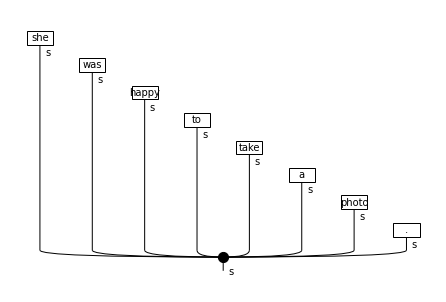

In [27]:
# Rewriting the sentence diagrams
#for i in range(len(raw_train_diagrams)):
    #raw_train_diagrams[i] = rewriter(raw_train_diagrams[i])
    #raw_train_diagrams[i] = raw_train_diagrams[i].normal_form()
    # Tokenizing low occuring words in training dataset
    #raw_train_diagrams[i] = replace_functor(raw_train_diagrams[i])

for i in range(len(raw_dev_diagrams)):
    raw_dev_diagrams[i] = rewriter(raw_dev_diagrams[i])
    raw_dev_diagrams[i] = raw_dev_diagrams[i].normal_form()
    # Tokenizing low occuring words in validation dataset
    raw_dev_diagrams[i] = replace_functor(raw_dev_diagrams[i])

for i in range(len(raw_test_diagrams)):
    raw_test_diagrams[i] = rewriter(raw_test_diagrams[i])
    raw_test_diagrams[i] = raw_test_diagrams[i].normal_form()
    # Tokenizing low occuring words in test dataset
    raw_test_diagrams[i] = replace_functor(raw_test_diagrams[i])

# sample sentence diagram (entry 1)
raw_train_diagrams[0].draw()

In [28]:
# merging all diagrams into one for checking the new words
raw_all_diagrams = raw_train_diagrams + raw_dev_diagrams + raw_test_diagrams

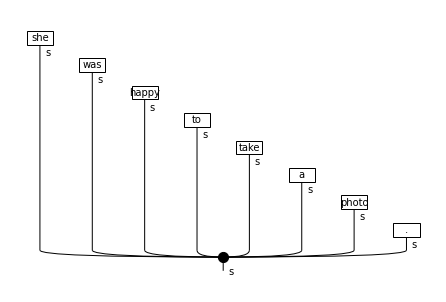

In [29]:
# removing cups (after performing top-to-bottom scan of the word diagrams)
train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

# sample sentence diagram (entry 1)
train_diagrams[0].draw()

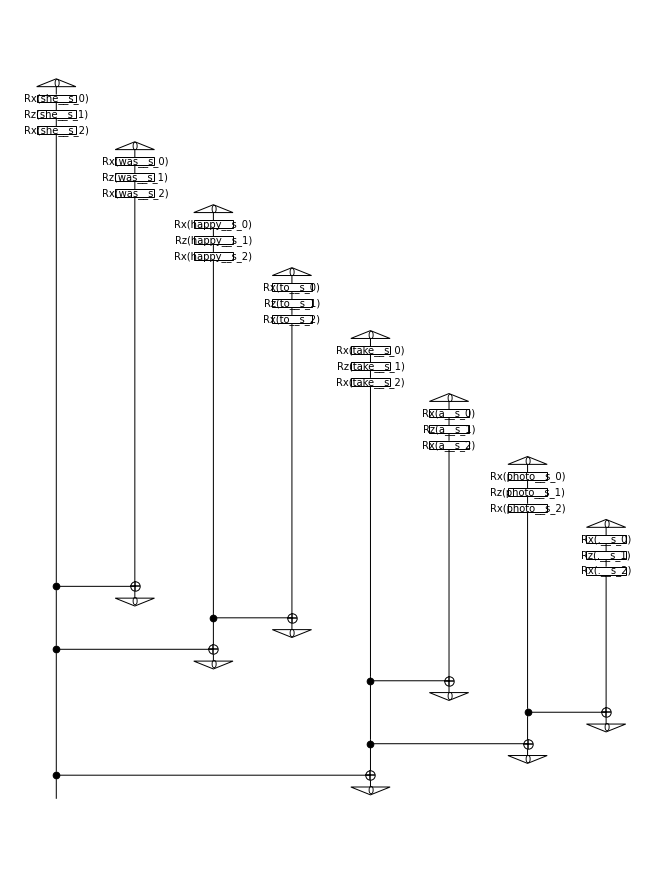

In [31]:
# initializing the ansatz for generating the circuit (2 layer, 3 qubits) (output : 1 qubit)
ansatz = Sim13({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1}, n_layers=5,
                   n_single_qubit_params=3)

# train/test circuits
train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits = [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

# sample circuit diagram
train_circuits[0].draw(figsize=(9, 12))
train_circuit_tk = train_circuits[0].to_tk()
render_circuit_jupyter(train_circuit_tk)

# all circuits
all_circuits = train_circuits + dev_circuits + test_circuits

In [32]:
# initializing the Aer backend only when using TketModel
backend = AerBackend()
# backend configs
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

In [33]:
# initializing the Numpy Quantum Model model (TKET simulates a NISQ system and can be time consuming, hence we will use Numpy)
# model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)
model = NumpyModel.from_diagrams(all_circuits)

# defining loss and accuracy (binary cross entropy)
eps = sys.float_info.epsilon
print(eps)
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat + eps)) / len(y)
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2

2.220446049250313e-16


In [34]:
# initializing the trainer for the model
trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,    # Simultaneous Perturbation Stochastic Approximation optimizer
    optim_hyperparams={'a': 0.2, 'c': 0.06, 'A': 0.01 * EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose='text',
    seed=0
)

In [35]:
# training dataset (Quantum batch optimization)
train_dataset = Dataset(train_circuits, train_labels, batch_size=BATCH_SIZE)
# validation dataset
val_dataset = Dataset(dev_circuits, dev_labels, shuffle=False)
# fitting the model (training on train and validation dataset)
trainer.fit(train_dataset, val_dataset, logging_step=12)

Epoch 1:    train/loss: 1.2995   valid/loss: 1.1162   train/acc: 0.4574   valid/acc: 0.4961
Epoch 12:   train/loss: 0.6332   valid/loss: 0.7794   train/acc: 0.7442   valid/acc: 0.7054
Epoch 24:   train/loss: 0.6955   valid/loss: 0.9382   train/acc: 0.6822   valid/acc: 0.6124
Epoch 36:   train/loss: 0.6404   valid/loss: 0.7344   train/acc: 0.7287   valid/acc: 0.6822
Epoch 48:   train/loss: 0.4333   valid/loss: 0.5431   train/acc: 0.8295   valid/acc: 0.7442
Epoch 60:   train/loss: 0.4125   valid/loss: 0.5444   train/acc: 0.8527   valid/acc: 0.7287
Epoch 72:   train/loss: 0.3318   valid/loss: 0.4352   train/acc: 0.8760   valid/acc: 0.7674
Epoch 84:   train/loss: 0.3083   valid/loss: 0.4207   train/acc: 0.8837   valid/acc: 0.8140
Epoch 96:   train/loss: 0.3033   valid/loss: 0.5086   train/acc: 0.8992   valid/acc: 0.7829
Epoch 108:  train/loss: 0.2615   valid/loss: 0.4401   train/acc: 0.9147   valid/acc: 0.8217
Epoch 120:  train/loss: 0.2367   valid/loss: 0.3734   train/acc: 0.9225   valid/

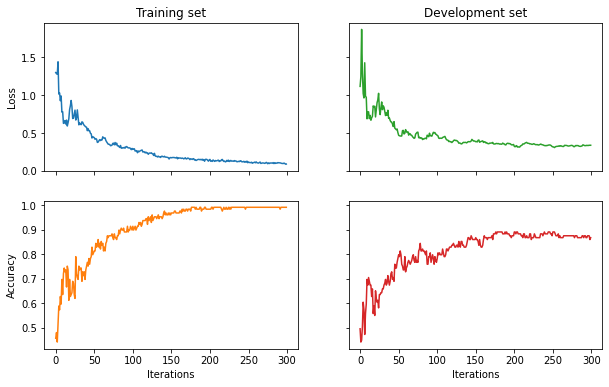

In [36]:
# plotting results
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(trainer.train_results['acc'], color=next(colours))
ax_tr.plot(trainer.val_costs, color=next(colours))
ax_br.plot(trainer.val_results['acc'], color=next(colours))
plt.show()

In [37]:
# Model accuracy on test dataset
test_acc = acc(model(test_circuits), test_labels)
train_acc = acc(model(train_circuits), train_labels)
dev_acc = acc(model(dev_circuits), dev_labels)
cumulative_acc = (train_acc + dev_acc + test_acc) / 3
print('Test accuracy:', test_acc)
print("Model summary")
print("Train accuracy : ", train_acc)
print("Validation accuracy : ", dev_acc)
print("Test accuracy: ", test_acc)
print("Cummulative accuracy : ", cumulative_acc)

Test accuracy: 0.8769230769230769
Model summary
Train accuracy :  0.9922480620155039
Validation accuracy :  0.8682170542635659
Test accuracy:  0.8769230769230769
Cummulative accuracy :  0.9124627310673823
